### Business Objective

* Helps manage inventory, staffing, and marketing efficiently.
* Aids in budgeting, cash flow management, and investment decisions.
* Informs product development, pricing, and market strategies.
* Allows businesses to prepare for sales fluctuations and address potential issues early.s.

### EDA (Exploratory Data Analysis)

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

df=pd.read_csv('retail_sales_dataset.csv') 
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [15]:
df['Date'] = pd.to_datetime(df['Date'])

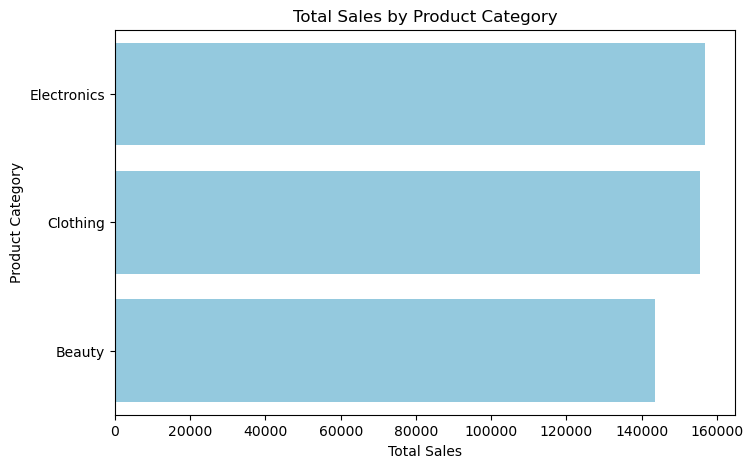

In [19]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index().sort_values(by='Total Amount', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Total Amount', y='Product Category', data=category_sales, color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

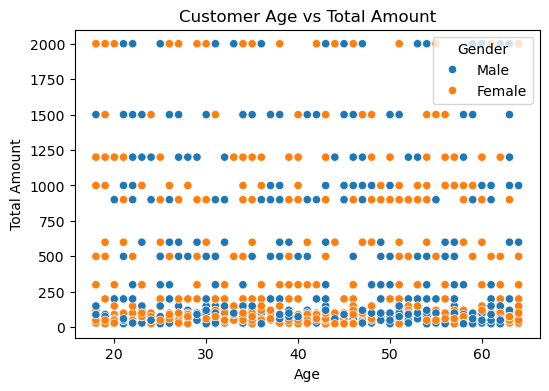

In [23]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Total Amount', data=df, hue='Gender')
plt.title('Customer Age vs Total Amount')
plt.show()

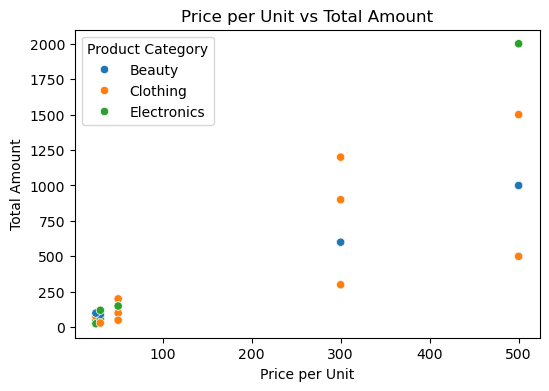

In [25]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Price per Unit', y='Total Amount', data=df, hue='Product Category')
plt.title('Price per Unit vs Total Amount')
plt.show()

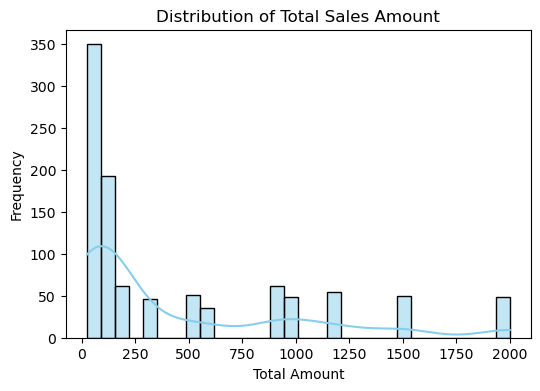

In [27]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Total Amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Sales Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

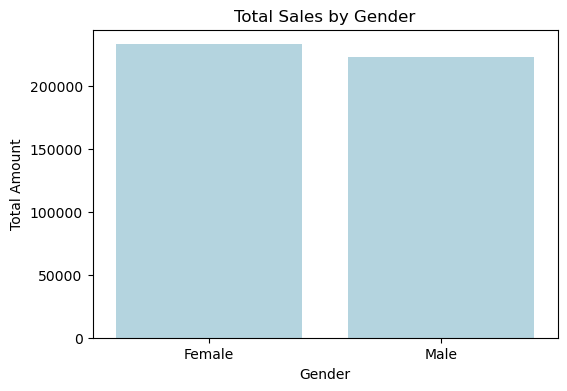

In [29]:
gender_sales = df.groupby('Gender')['Total Amount'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Total Amount', data=gender_sales, color='lightblue')
plt.title('Total Sales by Gender')
plt.show()

### Data Preprocessing

In [32]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [34]:
df.drop(columns=['Transaction ID', 'Customer ID', 'Date'], inplace=True)

In [36]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [38]:
X = df_encoded.drop('Total Amount', axis=1)
y = df_encoded['Total Amount']

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Model

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [51]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [53]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

### Results

Linear Regression

In [60]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("RMSE:", rmse_lr)
print("MAE:", mae_lr)
print("R² Score:", r2_lr)
print()

Linear Regression:
RMSE: 204.65578917517283
MAE: 173.20854346790787
R² Score: 0.8569189755192663



Ridge Regression

In [64]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print("RMSE:", rmse_ridge)
print("MAE:", mae_ridge)
print("R² Score:", r2_ridge)
print()

Ridge Regression:
RMSE: 204.66276420664644
MAE: 173.19769753860834
R² Score: 0.8569092224440197



Lasso Regression

In [67]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print("RMSE:", rmse_lasso)
print("MAE:", mae_lasso)
print("R² Score:", r2_lasso)

Lasso Regression:
RMSE: 204.5847409197302
MAE: 173.06943981207098
R² Score: 0.8570183022244984


In [73]:
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "RMSE": [rmse_lr, rmse_ridge, rmse_lasso],
    "MAE": [mae_lr, mae_ridge, mae_lasso],
    "R² Score": [r2_lr, r2_ridge, r2_lasso]
})

results_df

,Model,RMSE,MAE,R² Score
0,Linear Regression,204.655789,173.208543,0.856919
1,Ridge Regression,204.662764,173.197698,0.856909
2,Lasso Regression,204.584741,173.069440,0.857018


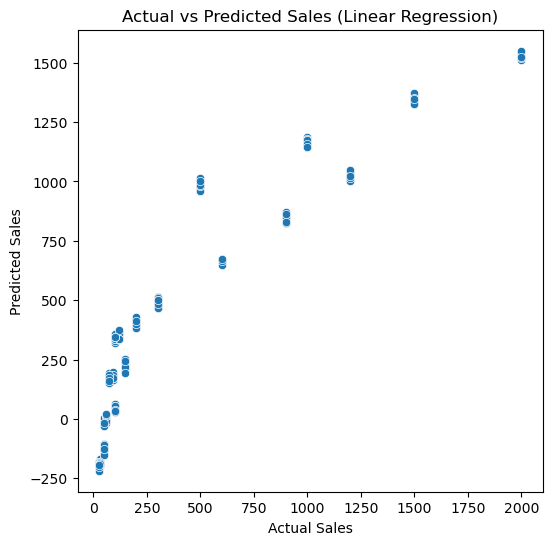

In [69]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Linear Regression)")
plt.show()

### Conclusion 

- Linear, Ridge, and Lasso Regression models were built to predict sales revenue.
- The best model (based on R² Score and RMSE) is **Ridge Regression**.
- Key sales drivers included:
  - **Product Category**
  - **Price per Unit**
  - **Quantity**
  - **Customer Age**
- Sales prediction enables the business to:
  - Forecast demand and manage inventory.
  - Plan discounting and marketing campaigns.
  - Allocate staff based on expected customer activity.

Recommendation:
- Focus on high-performing categories for promotions.
- Consider bundling strategies for expensive items.
- Target customers aged 25–45 who show strong spending behavior.